# Compound design: merging
----

<font size="3">In this part of the practical we will explore a different method of compound design: merging. Merging is used for fragments that bind in partially overlapping space. Merges are designed to incorporate substructures from each of the fragments, therefore maximizing the number of interactions made.
</font>

<img src="https://pubs.rsc.org/en/Image/Get?imageInfo.ImageType=GA&imageInfo.ImageIdentifier.ManuscriptID=C5OB02630J&imageInfo.ImageIdentifier.Year=2016">


## Exercise
----
In this exercise, we will attempt to manually design a fragment merge. Manual design is often performed by medicinal chemists, and most examples of fragment merges in the literature have been designed in this way.
1. In fragalysis, look through the molecules in the aminopydradine-like site and design a new molecule by merging.
    - **HINT**: to see an example merge, try visualising fragments x0107_0A, x1382_0A and x2646_0A
2. Go to manifold: https://postera.ai/manifold and sketch in your molecule to search for it and see if it is available.
3. When the search is complete, look through the different tabs and explore
4. Have a look at the chemical properties and alerts tab. Note down any problems.


## Automated merging
----

<font size="3">    
One algorithm that XChem has used for this in the moonshot work is Fragmenstein https://github.com/matteoferla/Fragmenstein.
    
Read the ``README`` page on the Fragmenstein page to understand how it calculates mergers.
    
    
The algorithm can take a long time to run, so we have produced the results of the calculation for you. They can be found in ``mergers/aminopyridine.sdf``.

There are 14,197 molecules that have been calculated with Fragmenstein. This is an extemely large number, and will need to be filtered and cut down to a more managable number.

## Exercise
----
<font size="3">In the next cell, there is some rdkit code that makes use of a feature called PandasTools to read the 3D molecules from the fragmenstein results and puts them into a dataframe. In this dataframe, the ``Molecule`` column contains molecues objects that can be operated upon further with rdkit. </font>

,smiles,%Rank,ref_mols,∆∆G,∆G_bound,∆G_unbound,LE,comRMSD,N_constrained_atoms,N_unconstrained_atoms,N_diff_atoms,ID,SMILES,Molecule
0,CCCCOC1CC(C)C(Cl)CC1CC(O)NC1CNCCC1C,0.006496,"Mpro-x11562_0A,Mpro-x10248_0A",-9.993901,-9.666701,0.3272,-0.416413,0.18852,24.0,0.0,17.0,Mpro-x11562_0A-Mpro-x10248_0A,CCCCO[C@@H]1C[C@@H](C)[C@@H](Cl)C[C@@H]1C[C@H]...,
1,CCCCOC1CCC(Cl)CC1CC(O)NN1C(C)NNC1O,0.012992,"Mpro-x10604_0A,Mpro-x11562_0A",-9.062522,-8.384158,0.678364,-0.394023,0.17788,23.0,0.0,17.0,Mpro-x10604_0A-Mpro-x11562_0A,CCCCO[C@@H]1CC[C@@H](Cl)C[C@@H]1C[C@@H](O)NN1[...,
2,CCCCOC1CCC(Cl)CC1CC(O)NC1CNCC(N)C1C,0.019488,"Mpro-x11562_0A,Mpro-x11317_0A",-10.222444,-9.184271,1.038173,-0.425935,0.199697,24.0,0.0,18.0,Mpro-x11562_0A-Mpro-x11317_0A,CCCCO[C@@H]1CC[C@H](Cl)C[C@@H]1C[C@@H](O)N[C@@...,
3,OCC1CCNCC1N[C@]1(O)CC2C3C(CC[SH]24(Cl)CC4)OCCC31,0.025984,"Mpro-x10942_0A,Mpro-x10801_0A",-9.684884,-8.181649,1.503235,-0.387395,0.20319,25.0,0.0,14.0,Mpro-x10942_0A-Mpro-x10801_0A,OC[C@@H]1CCNC[C@@H]1N[C@]1(O)C[C@@H]2[C@H]3[C@...,
4,CCCCOC1CCC(Cl)CC1NC(O)NC1CNCCC1C,0.03248,"Mpro-x2908_0A,Mpro-x11562_0A",-10.146338,-9.336794,0.809544,-0.441145,0.233235,23.0,0.0,18.0,Mpro-x2908_0A-Mpro-x11562_0A,CCCCO[C@@H]1CC[C@@H](Cl)C[C@@H]1N[C@@H](O)N[C@...,

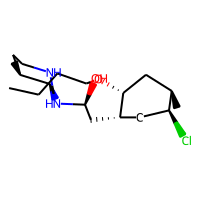
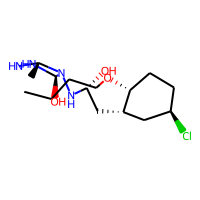
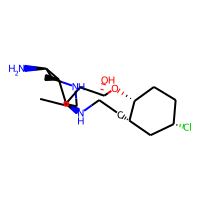
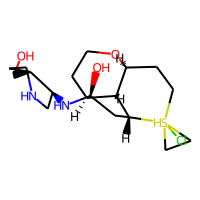
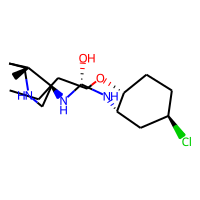

In [1]:
# https://www.rdkit.org/docs/source/rdkit.Chem.PandasTools.html

from rdkit.Chem import PandasTools
import pandas as pd
import os
from rdkit import RDConfig
from rdkit import Chem

sdf_path = 'mergers/aminopyridine.sdf'

frame = PandasTools.LoadSDF(sdf_path, smilesName='SMILES', molColName='Molecule', includeFingerprints=False)
display(frame.head())

<font size="3">Common filters in lead-optimisation and drug design include simple filters to determine whether a molecule is 'lead-like' or drug like. One way of doing this is using Lipinski's rule of five. Have a look at the Wikipedia article to see what the four rules are for determining druglikeness: https://en.wikipedia.org/wiki/Lipinski's_rule_of_five.

In the next cell, use the ``rdkit.Descriptors`` module to filter down the molecules in ``frame`` using Lipinski's rules. An example is shown below, whereby we filter out all molecules that have a molecular weight of above 500 daltons. Try writing code to further filter the molecules using the other three rules. Write out the new filtered set of molecules to a new sdf file using PandasTools, and save them to your own computer. **Don't forget to download a copy of this notebook**

```python
from rdkit.Chem import Descriptors

too_heavy = []

for i in range(0,len(frame)):
    molwt = Descriptors.MolWt(frame.iloc[i]['Molecule'])
    if molwt > 500:
        too_heavy.append(i)
        
print(len(too_heavy))
```

- **HINT**: A list of available descriptors can be found here: https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors
- **HINT**: Try using ``rdkit.Chem.PandasTools.WriteSDF`` to create the sdf file: http://rdkit.org/docs/source/rdkit.Chem.PandasTools.html
- **OPTIONAL**: There are several extensions to Lipinski's rules, which can be found in the Wikipedia article. If you would like to try filtering down the molecules further, try implementing some additional filters, and see how many molecules this removes.

In [6]:
# write your code here
from rdkit.Chem import Crippen, Descriptors, rdMolDescriptors

passing_mols = []
passing_ids = []

for i in range(0,len(frame)):
    molwt = Descriptors.MolWt(frame.iloc[i]['Molecule'])
    logp = Crippen.MolLogP(frame.iloc[i]['Molecule'])
    HBA = Chem.rdMolDescriptors.CalcNumHBA(frame.iloc[i]['Molecule'])
    HBD = Chem.rdMolDescriptors.CalcNumHBD(frame.iloc[i]['Molecule'])
    
    violations = 0
    
    if molwt>500:
        violations += 1
    if logp > 5:
        violations += 1
    if HBA > 10:
        violations += 1
    if HBD > 5:
        violations += 1
    
    if violations < 2:
        passing_mols.append(frame.iloc[i]['Molecule'])
        passing_ids.append(i)

,smiles,%Rank,ref_mols,∆∆G,∆G_bound,∆G_unbound,LE,comRMSD,N_constrained_atoms,N_unconstrained_atoms,N_diff_atoms,ID,SMILES,Molecule
0,CCCCOC1CC(C)C(Cl)CC1CC(O)NC1CNCCC1C,0.006496,"Mpro-x11562_0A,Mpro-x10248_0A",-9.993901,-9.666701,0.3272,-0.416413,0.18852,24.0,0.0,17.0,Mpro-x11562_0A-Mpro-x10248_0A,CCCCO[C@@H]1C[C@@H](C)[C@@H](Cl)C[C@@H]1C[C@H]...,
1,CCCCOC1CCC(Cl)CC1CC(O)NN1C(C)NNC1O,0.012992,"Mpro-x10604_0A,Mpro-x11562_0A",-9.062522,-8.384158,0.678364,-0.394023,0.17788,23.0,0.0,17.0,Mpro-x10604_0A-Mpro-x11562_0A,CCCCO[C@@H]1CC[C@@H](Cl)C[C@@H]1C[C@@H](O)NN1[...,
2,CCCCOC1CCC(Cl)CC1CC(O)NC1CNCC(N)C1C,0.019488,"Mpro-x11562_0A,Mpro-x11317_0A",-10.222444,-9.184271,1.038173,-0.425935,0.199697,24.0,0.0,18.0,Mpro-x11562_0A-Mpro-x11317_0A,CCCCO[C@@H]1CC[C@H](Cl)C[C@@H]1C[C@@H](O)N[C@@...,
3,OCC1CCNCC1N[C@]1(O)CC2C3C(CC[SH]24(Cl)CC4)OCCC31,0.025984,"Mpro-x10942_0A,Mpro-x10801_0A",-9.684884,-8.181649,1.503235,-0.387395,0.20319,25.0,0.0,14.0,Mpro-x10942_0A-Mpro-x10801_0A,OC[C@@H]1CCNC[C@@H]1N[C@]1(O)C[C@@H]2[C@H]3[C@...,
4,CCCCOC1CCC(Cl)CC1NC(O)NC1CNCCC1C,0.03248,"Mpro-x2908_0A,Mpro-x11562_0A",-10.146338,-9.336794,0.809544,-0.441145,0.233235,23.0,0.0,18.0,Mpro-x2908_0A-Mpro-x11562_0A,CCCCO[C@@H]1CC[C@@H](Cl)C[C@@H]1N[C@@H](O)N[C@...,

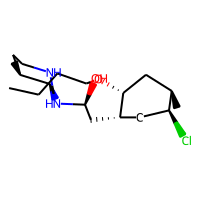
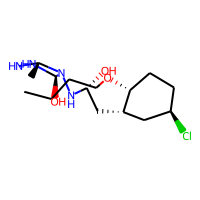
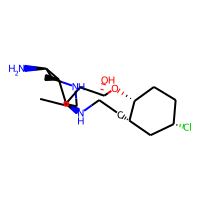
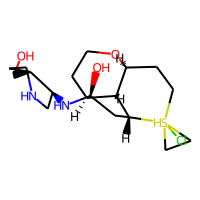
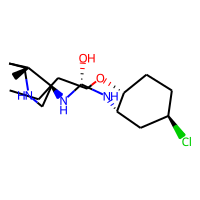

In [10]:
# to write file using PandasTools
filtered_frame = frame.iloc[passing_ids]
filtered_frame.head()

In [12]:
PandasTools.WriteSDF(filtered_frame, 'mergers/lipinski_filtered.sdf', molColName='Molecule', idName='ID')

In [13]:
# to write sdf file without filtering the dataframe
with Chem.SDWriter('mergers/lipinski_filtered_2.sdf') as w:
    for m in passing_mols:
        w.write(m)

## More advanced filtering
----
<font size="3">
After applying the filters in the exercise above, you will probably have around 10,000 molecules still left in the set when using drug-like criteria.

There are more advanced filters available to cut-down large libraries of molecules before in silico screening (e.g. docking). 

For example, certain chemical functionalities can affect how well high-throughput screening assays work, and give false positive or negative results. This means the calculation of how well they bind to the protein can be difficult. As a result, molecules containing these functionalities are often filtered out before any in silico or experimental screening. PAINS (pan-assay interference) compounds contain a defined set of substructural motifs that are likely to result in false positives. You can read more about them here: https://en.wikipedia.org/wiki/Pan-assay_interference_compounds.

Other common filters include ADME filters (this refers to the absorption, distribution, metabolism and excretion of drugs) and toxicity filters. A web-server for advanced filtering exists at https://fafdrugs4.rpbs.univ-paris-diderot.fr/index.html and the paper describing the different filters that can be applied, along with the implementation of algorithms can be found here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1538885/.


## Exercise
----
Using the sdf file from the filtering you applied in the previous exercise, use the FAFDrugs4 server to filter them further for ADME, Tox- and PAINS. Download the new sdf file of filtered molecules from the server once the calculations are complete.
